In [17]:
import numpy as np


class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    # Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    # RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        # Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        # RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)
            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def denormalize(arr, min, max):
    return arr * (max - min) + min

N = 10000
x, _, _ = Lorentz().generate(0.1, N - 1)

x_max = x.max()
x_min = x.min()
x = normalize(x)
print(x)
print(len(x))

[0.52356996 0.55805846 0.67809835 ... 0.51981119 0.55134232 0.63545381]
10000


In [18]:
import random
from itertools import product

Kmax = 20
L = 2

patterns = list(product(range(1, Kmax + 1), repeat=L-1))
pattern = random.choice(patterns)
pref = np.cumsum([0] + list(pattern))

T = len(x) // 2
seqs = [tuple([i + e for e in pref]) for i in range(T - sum(pattern))]
seqs


[(np.int64(0), np.int64(18)),
 (np.int64(1), np.int64(19)),
 (np.int64(2), np.int64(20)),
 (np.int64(3), np.int64(21)),
 (np.int64(4), np.int64(22)),
 (np.int64(5), np.int64(23)),
 (np.int64(6), np.int64(24)),
 (np.int64(7), np.int64(25)),
 (np.int64(8), np.int64(26)),
 (np.int64(9), np.int64(27)),
 (np.int64(10), np.int64(28)),
 (np.int64(11), np.int64(29)),
 (np.int64(12), np.int64(30)),
 (np.int64(13), np.int64(31)),
 (np.int64(14), np.int64(32)),
 (np.int64(15), np.int64(33)),
 (np.int64(16), np.int64(34)),
 (np.int64(17), np.int64(35)),
 (np.int64(18), np.int64(36)),
 (np.int64(19), np.int64(37)),
 (np.int64(20), np.int64(38)),
 (np.int64(21), np.int64(39)),
 (np.int64(22), np.int64(40)),
 (np.int64(23), np.int64(41)),
 (np.int64(24), np.int64(42)),
 (np.int64(25), np.int64(43)),
 (np.int64(26), np.int64(44)),
 (np.int64(27), np.int64(45)),
 (np.int64(28), np.int64(46)),
 (np.int64(29), np.int64(47)),
 (np.int64(30), np.int64(48)),
 (np.int64(31), np.int64(49)),
 (np.int64(32), np

In [19]:
from math import pi, factorial

samples = np.array([[x[i] for i in e] for e in seqs])

#print(samples[:, np.newaxis, :])
#print('------1---')
#print(samples[np.newaxis, :, :])
#print('------2---')
#print(samples[:, np.newaxis, :] - samples[np.newaxis, :, :])
#print('------3---')

distances = np.linalg.norm(samples[:, np.newaxis, :] - samples[np.newaxis, :, :], axis=2)
sorted_distances = np.sort(distances, axis=1)
argsorted_distances = np.argsort(distances, axis=1)

r = 11
mu = 0.2
r_nearest_distances = sorted_distances[:, r]
ordered = np.argsort(r_nearest_distances)

def double_factorial(n):
    if n <= 1:
        return 1
    return n * double_factorial(n - 2)

def get_volume_coefficient(L: int):
    if L % 2 == 0:
        return pi ** (L // 2) / factorial((L // 2))
    return 2 ** (L // 2 + 1) * pi ** (L // 2) / double_factorial(L)

VOLUME_CONST = get_volume_coefficient(L)

def L_dimensional_volume(arr):
    return arr ** L * VOLUME_CONST


#print(r_nearest_distances)
#print(ordered)
#print(np.sort(r_nearest_distances))
#print(r_nearest_distances[ordered])

sz = len(seqs)

#print(r_nearest_distances)
p = r / (L_dimensional_volume(r_nearest_distances) * sz)
#print(list(p))


In [20]:
w = np.array([-1] * sz)
completed = np.array([False] * sz)
clusters = [[] for _ in range(sz)]
#significant = np.array([False] * sz)

def is_significant(index: int):
    if not clusters[index]:
        return False
    if completed[index]:
        return True
    current_cluster = p[np.array(clusters[index])]
    return np.max(np.abs(current_cluster[:, np.newaxis] - current_cluster[np.newaxis, :])) >= mu

ind = 1
for q in ordered:
    nei = argsorted_distances[q, 1:r + 1]
    w_nei = w[nei]
    cs = np.unique(w_nei[w_nei != -1])
    if cs.size == 0:  # not connected to clusters
        w[q] = ind
        clusters[ind].append(q)
        ind += 1
        continue
    cs = cs[~completed[cs]]
    if cs.size == 0:  # all clusters are completed
        w[q] = 0
        clusters[0].append(q)
        continue
    significant = np.array([is_significant(e) for e in cs])
    k = np.sum(significant)
    if k > 1 or cs[0] == 0:
        w[q] = 0
        completed[cs[significant]] = True
        #w[cs[~significant]] = -1
    else:
        for e in cs[1:]:
            clusters[cs[0]] += clusters[e]
        clusters[cs[0]].append(q)
        w[np.isin(w, cs)] = cs[0]
        w[q] = cs[0]

resulting_clusters = np.unique(w)
clst = []
for i in resulting_clusters:
    clst.append(samples[np.array(clusters[i])])
clst_indexes = []
for i in resulting_clusters:
    clst_indexes.append(np.array(clusters[i]))
print(resulting_clusters)
for e in clst[:5]:
    print(e)

[  0   1   2   3   4   5   6   7   8  10  11  12  14  15  16  17  19  20
  21  22  23  24  25  26  28  29  30  31  33  34  35  36  37  38  39  41
  42  43  44  45  46  47  48  51  52  54  56  57  59  61  63  64  65  67
  69  70  71  74  75  80  81  82  83  84  85  87  88  90  91  92  93  95
  96  97  98  99 101 102 103 105 106 107 108 109 110 112 114 115 116 117
 118 119 120 121 122 123 125 126 128 129 130 131 132 133 134 135 136 138
 140 142 144 145 146 147 148 150 151 152 154 156 157 158 159 160 161 162
 163 164 165 167 168 174 175]
[[0.59466846 0.87986105]
 [0.58062347 0.9002428 ]
 [0.59471665 0.86524086]
 ...
 [0.42205297 1.        ]
 [1.         0.21925129]
 [0.93298429 0.02546119]]
[[0.11965494 0.45828092]
 [0.11441513 0.45948774]
 [0.12320424 0.45275797]
 [0.1194676  0.4562306 ]
 [0.1226749  0.45459742]
 [0.12064349 0.45671488]
 [0.11246047 0.46569262]
 [0.12006987 0.45224092]
 [0.11527104 0.46217229]
 [0.11992885 0.45433341]
 [0.11548396 0.46220264]
 [0.11607369 0.46265906]
 [0

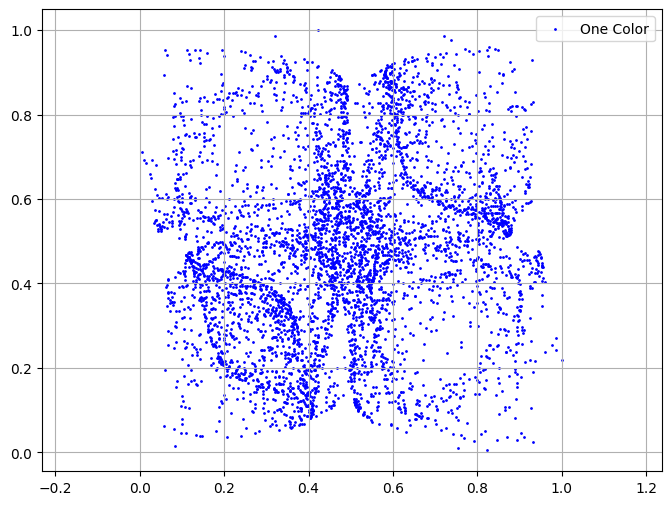

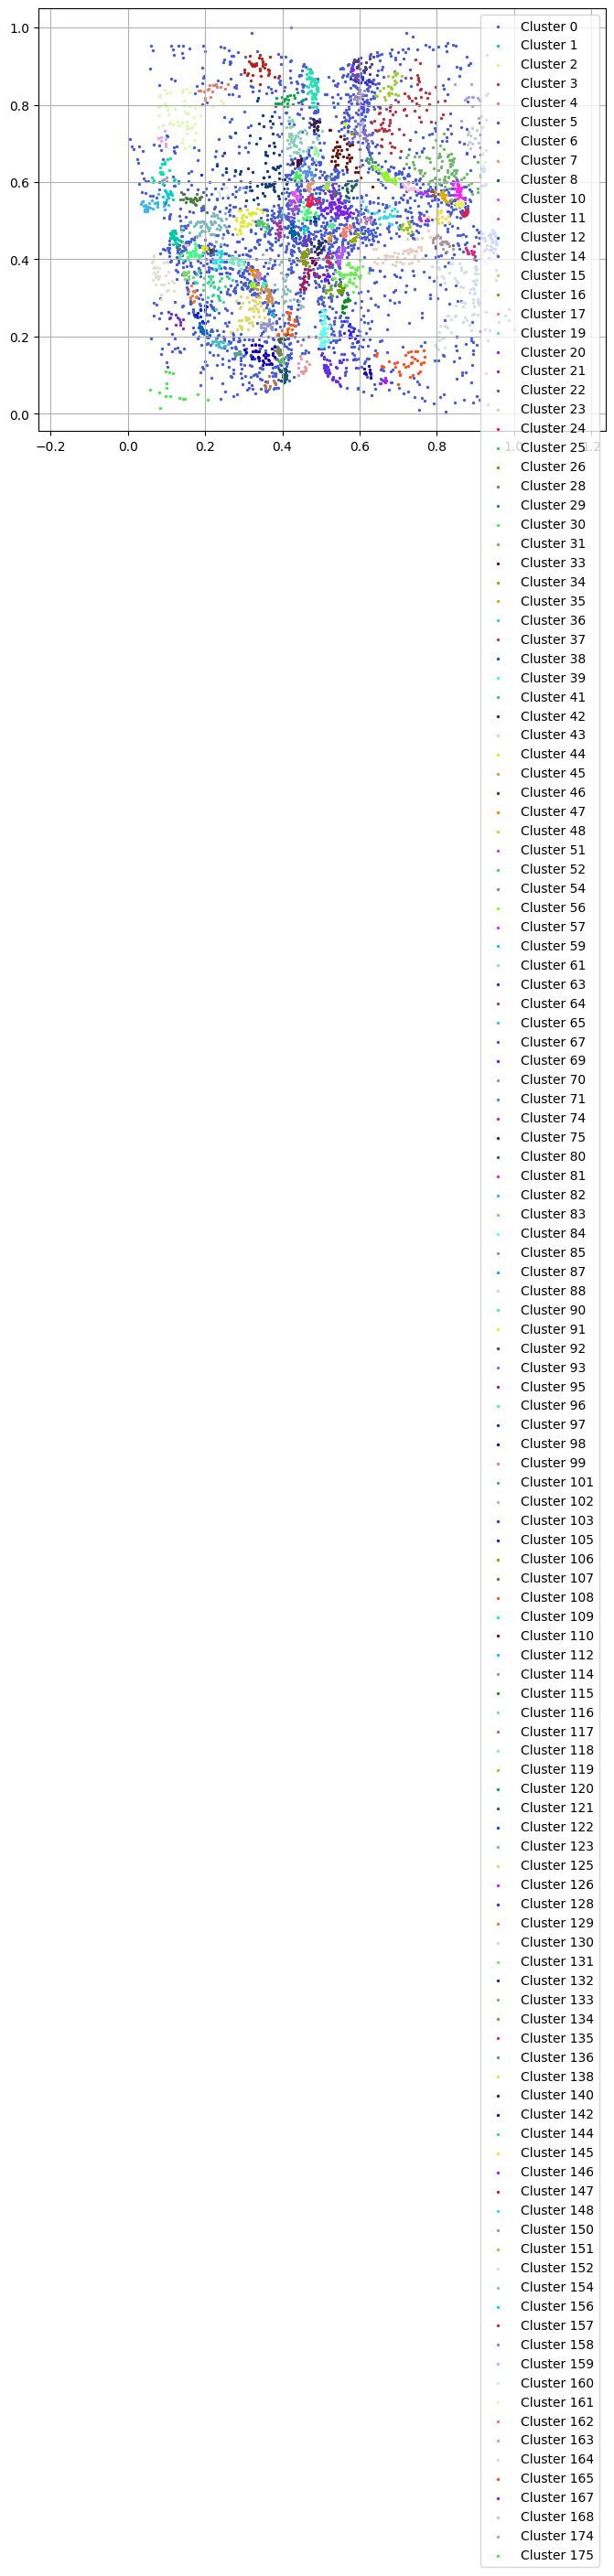

In [21]:
import matplotlib.pyplot as plt

X, Y = samples[:, 0], samples[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label="One Color", s=1)
plt.grid()
plt.axis("equal")
plt.legend()
plt.show()


unique_groups = np.unique(resulting_clusters)
random_colors = np.random.rand(max(unique_groups) + 1, 3)

plt.figure(figsize=(8, 6))
for index, i in enumerate(unique_groups):
    plt.scatter(X[clst_indexes[index]], Y[clst_indexes[index]], color=random_colors[i], s=2, label=f"Cluster {i}")

plt.grid()
plt.axis("equal")
plt.legend()
plt.show()

